<a href="https://colab.research.google.com/github/lepanegossi/MVP_PUC_Analise_Dados/blob/main/MVP_PUC__Analise_Dados.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>


## 1. Definição do Problema

O conjunto de dados utilizado neste projeto é o Breast Cancer Dataset, disponibilizado na plataforma Kaggle (https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset).
Trata-se de um dataset voltado para problemas de Aprendizado Supervisionado, mais especificamente de Classificação binária.

O arquivo reúne informações clínicas e morfológicas de tumores mamários extraídas de exames de imagem. Cada registro no conjunto de dados representa um diagnóstico individual, com atributos que descrevem medidas como textura, concavidade, simetria, área, raio e outros aspectos das células analisadas. Esses dados foram originalmente coletados pela Universidade de Wisconsin, nos Estados Unidos.

O dataset contém 569 linhas e 32 colunas, sendo 30 variáveis numéricas derivadas de características dos núcleos celulares, uma coluna que representa o diagnóstico (diagnosis), com os valores “M” (maligno) ou “B” (benigno), e uma coluna de identificação que pode ser descartada durante o pré-processamento.

O objetivo principal do conjunto de dados é auxiliar na construção de modelos que possam prever, com base nos atributos fornecidos, se um tumor é benigno ou maligno. O campo diagnosis serve como variável-alvo para os modelos de classificação, sendo convertido para valores binários (1 para maligno e 0 para benigno) durante o pré-processamento dos dados.


**Definição dos atributos presentes no Dataset:**

1. **id:** Identificador numérico único para cada exame.
2. **diagnosis:** Variável categórica do tumor, de acordo com o diagnóstico, sendo:
  * M = maligno (câncer)
  * B = benigno (não-câncer)
3. **radius:** Média da distância do centro ao limite do núcleo celular analisado.
4. **texture:** mede a variação nos níveis de cinza dentro do núcleo, associada à granulação da imagem.
5. **perimeter:** Comprimento do contorno do núcleo celular.
6. **area:** Área do núcleo celular.
7. **smoothness:** Regularidade das bordas do núcleo (variação local no comprimento do perímetro).
8. **compactness:** Relação entre o perímetro e a área do núcleo, indicando o grau de compacidade.
9. **concavity:** Grau de concavidade das bordas do núcleo, ou quão fundas são as partes côncavas.
10. **concave points:** Número de pontos côncavos na borda do núcleo.
11. **symmetry:** Grau de simetria do núcleo celular.
12. **fractal_dimension:** complexidade da borda do núcleo medida pela dimensão fractal.


Além disso, todos os atributos têm suas versões *mean, se e worst*, e essas três formas ajudam a capturar não só o comportamento médio da célula, mas também sua variabilidade.

13. **radius_mean, radius_se, radius_worst:** Distância média, erro padrão e maior distância do centro ao limite do núcleo.
14. **texture_mean, texture_se, texture_worst:** Variação na intensidade dos pixels (granulação da imagem).
15. **perimeter_mean, perimeter_se, perimeter_worst:** Comprimento médio, variabilidade e maior contorno do núcleo.
16. **area_mean, area_se, area_worst:** Área média, variabilidade e maior área do núcleo.
17. **smoothness_mean, smoothness_se, smoothness_worst:** Regularidade das bordas do núcleo.
18. **compactness_mean, compactness_se, compactness_worst:** Medida do quão compacto é o núcleo (relação perímetro²/área).
19. **concavity_mean, concavity_se, concavity_worst:** Profundidade das partes côncavas da borda.
20. **concave points_mean, concave points_se, concave points_worst:** Número de pontos côncavos na borda do núcleo.
21. **symmetry_mean, symmetry_se, symmetry_worst:** Grau de simetria do núcleo.
22. **fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst:** Complexidade da borda do núcleo (dimensão fractal).

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Importação do Dataset

Primeiramente, utilizando o pacote Pandas iremos carregar o Dataset (arquivo .csv), e explorá-lo em seguida.

In [ ]:
# Carregamento do arquivo .csv

# URL de importação do Dataset
url = "https://raw.githubusercontent.com/lepanegossi/MVP_PUC_Analise_Dados/main/breast-cancer.csv"


# Carga do Dataset citando a variável URL
df_origem = pd.read_csv(url, delimiter=',')

## 3. Pré-Visualização de Dados






In [ ]:
# Visualização das primeiras 5 linhas do Dataset
df_origem.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Visualização das últimas 5 linhas do Dataset
df_origem.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Visualizando as informações gerais do Dataset, é possível verificar o número de linhas (569) e colunas (32), além dos tipos dos dados.

In [ ]:
# Informações gerais sobre o dataset
print("Dimensões do dataset:", df_origem.shape)
print("\nInformações do dataset:")
print(df_origem.info())

Dimensões do dataset: (569, 32)

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se             

Através do resultado acima, observa-se:
* **Nulos**: Todas as colunas estão com dados preenchidos na totalidade, porém ainda assim se faz necessário uma checagem de valores tidos como *missing*.
* **Uso de memória**:  é de 142.4 KB
* **Tipos de dados**: Há registros do tipo strings(object), valores númericos do tipo inteiro (int64) e decimais (float64).

## 4. Alterações Pré-Análise


In [ ]:
# Criação de uma cópia do Dataset para ser utilizada nos processos seguintes
df_final = df_origem.copy()

In [ ]:
# Substituição da variável categórica da coluna 'diagnosis'
df_final['diagnosis'] = df_final['diagnosis'].replace({'M': 'Maligno', 'B': 'Benigno'})

A coluna 'diagnosis' estava categorizando o diagnóstico do núcleo das células como M (maligno) e B (benigno). Realizou-se portanto a conversão desses valores para 'Maligno' e 'Benigno' respectivamente, para fins de estudo e melhor compreensão da análise.

In [ ]:
#Visualizando os valores iniciais e finais do dataset, após alteração
display(df_final)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Maligno,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Maligno,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Maligno,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Maligno,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Maligno,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Maligno,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Maligno,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Maligno,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Maligno,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 5. Análise de Dados






### 5.1. Estatísticas Descritivas

Neste ponto, serão analisadas as estatísticad descritivas do Dataset, incluindo informações sobre dimensão, atributos e linhas.

In [ ]:
# Exibição dos atributos
df_final.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# Quantidade de linhas por coluna
df_final.count()

,0
id,569
diagnosis,569
radius_mean,569
texture_mean,569
perimeter_mean,569
area_mean,569
smoothness_mean,569
compactness_mean,569
concavity_mean,569
concave points_mean,569


In [ ]:
# Dimensões do dataset
# 569 linhas e 32 colunas
print(df_final.shape)

(569, 32)


In [ ]:
# Verificando se a classe de saída está desbalanceada

print("1. Contagem absoluta de cada classe:")
print(df_final['diagnosis'].value_counts())
print("\n2. Contagem percentual de cada classe:")
print(df_final['diagnosis'].value_counts(normalize=True).round(3) * 100, "%")

1. Contagem absoluta de cada classe:
diagnosis
Benigno    357
Maligno    212
Name: count, dtype: int64

2. Contagem percentual de cada classe:
diagnosis
Benigno    62.7
Maligno    37.3
Name: proportion, dtype: float64 %


No caso do dataset de câncer de mama:

* **Benignos (B):** 357 casos (62.7%)
* **Malignos (M):** 212 casos (37.3%)
* **Razão** ≈ 1.68

Isso indica um desbalanceamento moderado, mas não severo. Em casos como este:

O desbalanceamento não é grave o suficiente para comprometer significativamente o modelo.
Ainda assim, durante o treinamento do modelo, podemos considerar técnicas como:
* Usar métricas adequadas para dados desbalanceados (como F1-score em vez de acurácia)
* Aplicar pesos diferentes às classes durante o treinamento
* Utilizar técnicas de balanceamento como SMOTE ou under/oversampling se necessário


In [ ]:
# Verificação de valores missing
print(df_final.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Como já visto, não foram identificados valores missing


In [ ]:
# Removendo as colunas não numéricas para o sumário estatístico
df_numeric = df.drop(['id', 'diagnosis'], axis=1)

# Gerando o sumário estatístico
print("Sumário Estatístico dos Atributos Numéricos:")
print("\nDimensões do conjunto de dados numéricos:", df_numeric.shape)
print("\nEstatísticas descritivas:")
summary = df_numeric.describe()
print(summary)

# Análise mais detalhada por grupo de medidas
print("\n=== Análise por Grupos de Medidas ===")

# Separando os atributos por tipo de medida
mean_features = [col for col in df_numeric.columns if 'mean' in col]
se_features = [col for col in df_numeric.columns if '_se' in col]
worst_features = [col for col in df_numeric.columns if 'worst' in col]

print("\n1. Medidas Médias:")
print(df_numeric[mean_features].describe())

print("\n2. Medidas de Erro Padrão (SE):")
print(df_numeric[se_features].describe())

print("\n3. Piores Medidas:")
print(df_numeric[worst_features].describe())

# Análise das escalas e variabilidade
print("\n=== Análise de Escalas e Variabilidade ===")
for column in df_numeric.columns:
    print(f"\nAtributo: {column}")
    print(f"Intervalo: {df_numeric[column].min():.2f} a {df_numeric[column].max():.2f}")
    print(f"Coeficiente de Variação: {(df_numeric[column].std()/df_numeric[column].mean()*100):.2f}%")

Sumário Estatístico dos Atributos Numéricos:

Dimensões do conjunto de dados numéricos: (569, 30)

Estatísticas descritivas:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813      

Este código fornece:

**Estatísticas básicas para todos os atributos numéricos:**
* Contagem (count)
* Média (mean)
* Desvio padrão (std)
* Valor mínimo (min)
* Quartis (25%, 50%, 75%)
* Valor máximo (max)

**Análise separada por grupos de características:**
* Medidas médias
* Medidas de erro padrão
* Piores medidas
* Análise de escalas e variabilidade:
* Intervalo de valores para cada atributo
* Coeficiente de variação (que indica a dispersão relativa dos dados)


**Principais observações do sumário estatístico:**

1. **Diferentes escalas:** Algumas variáveis como 'area_mean' têm valores muito maiores que outras.
Isso indica necessidade de normalização/padronização dos dados.

2. **Assimetria:** Muitas variáveis têm médias diferentes das medianas, indicando distribuições não normais.
3. **Variabilidade:** Diferentes níveis de dispersão entre as variáveis. Algumas características têm maior variabilidade que outras.

### 5.2 Visualizações

#### 5.2.1 Unimodais

Para a identifição de outliers, podemos utilizar de visualizações unimodais.


<Figure size 1500x600 with 0 Axes>

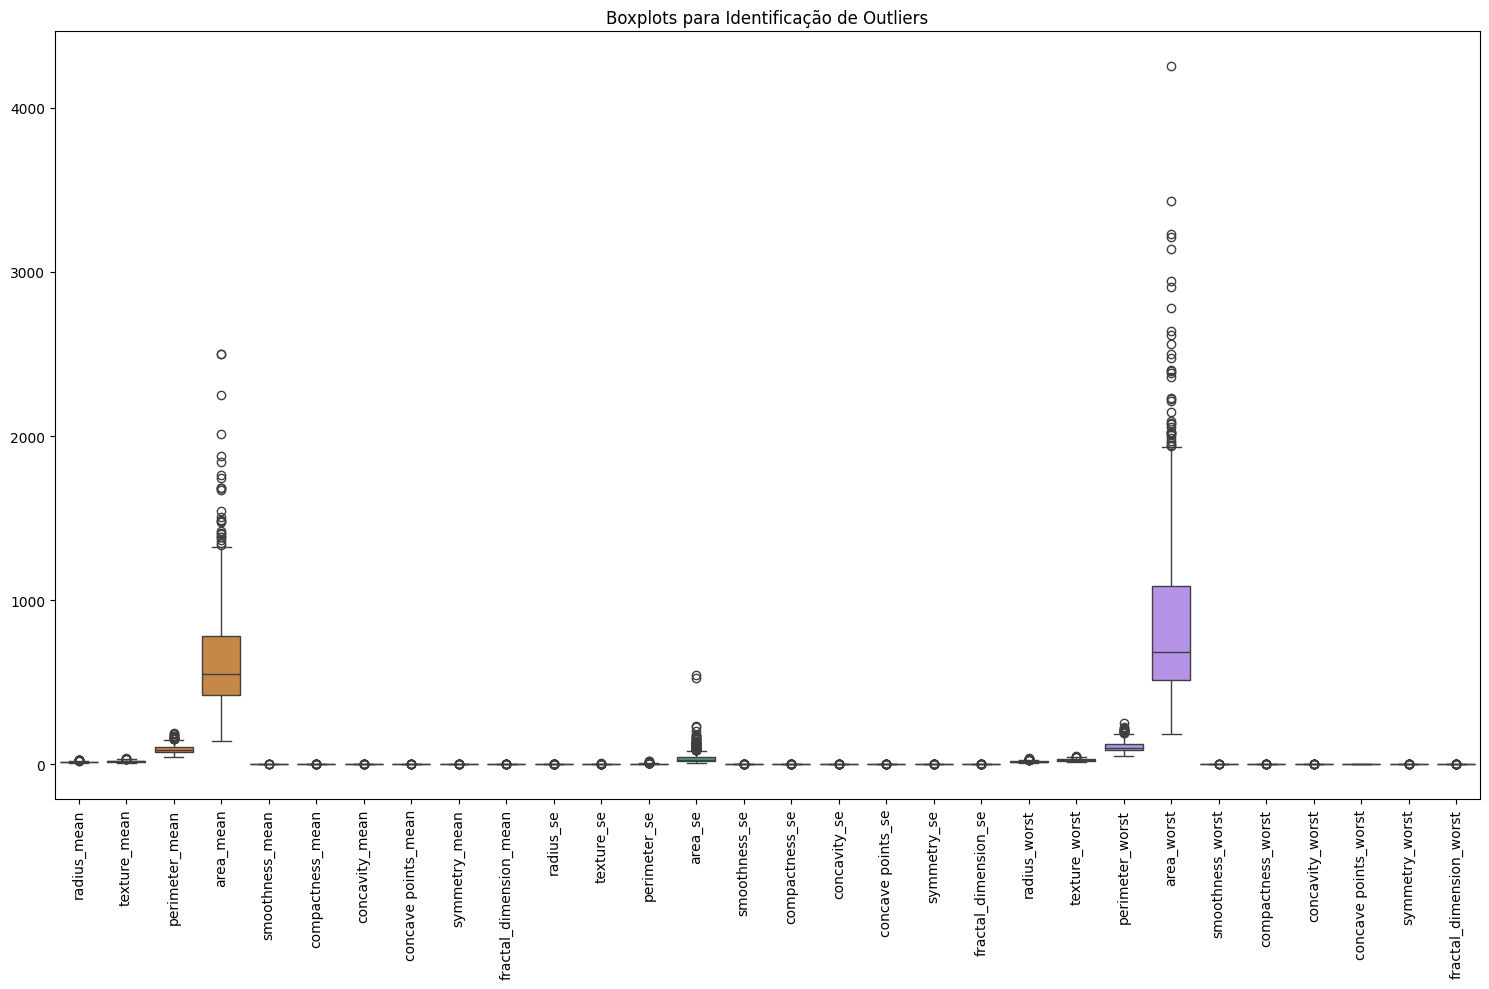

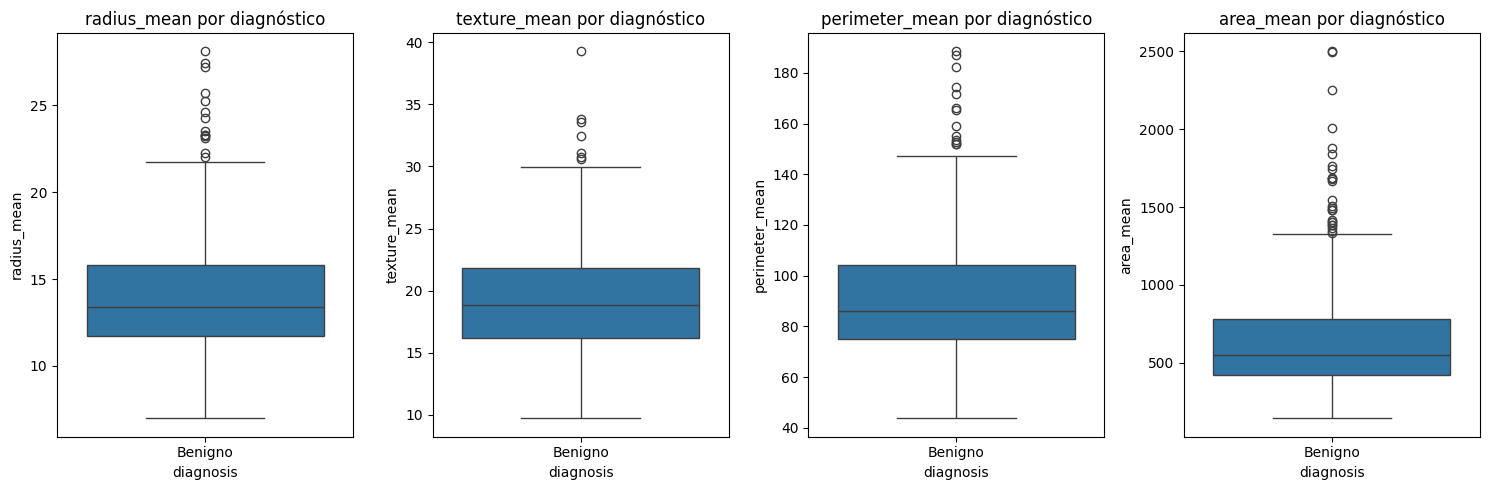

In [ ]:
# Análise de outliers através de boxplots
plt.figure(figsize=(15, 6))

# Removendo a coluna 'id' e separando características numéricas
df_numeric = df.drop('id', axis=1)
numeric_columns = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Criando boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numeric[numeric_columns])
plt.xticks(rotation=90)
plt.title('Boxplots para Identificação de Outliers')
plt.tight_layout()
plt.show()

# Para melhor visualização, podemos também ver boxplots separados por diagnóstico
# para algumas variáveis principais
principais_variaveis = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(15, 5))
for i, coluna in enumerate(principais_variaveis):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x='diagnosis', y=coluna, data=df)
    plt.title(f'{coluna} por diagnóstico')
plt.tight_layout()
plt.show()


A análise através de boxplots revelou a presença de outliers em diversas variáveis do dataset. Os boxplots nos permitem identificar:
- A mediana (linha dentro da caixa)
- O primeiro e terceiro quartis (limites da caixa)
- Os limites superiores e inferiores (whiskers)
- Os pontos além dos whiskers são considerados outliers

Observações principais:

1. **Características Gerais:**
- A maioria das variáveis apresenta outliers
- Os outliers são mais frequentes nos valores superiores (acima do whisker superior)
- Existe uma assimetria positiva em muitas variáveis (maior concentração de dados abaixo da mediana)

2. **Análise por Diagnóstico:**
- Para as variáveis principais analisadas (radius_mean, texture_mean, perimeter_mean, area_mean):
  - Tumores malignos (M) tendem a apresentar valores mais altos
  - A dispersão é maior nos casos malignos
  - Há sobreposição entre as distribuições de casos benignos e malignos

3. **Considerações para o Pré-processamento:**
- A presença de outliers sugere a necessidade de:
  - Normalização ou padronização dos dados
  - Possível uso de transformações (como log) para reduzir o impacto dos outliers
  - Cuidado especial na escolha de algoritmos que sejam robustos a outliers

4. **Observação Importante:**
- Por se tratar de dados médicos, os outliers podem representar casos importantes
- Não é recomendada a remoção automática dos outliers
- O tratamento deve considerar o contexto médico do problema

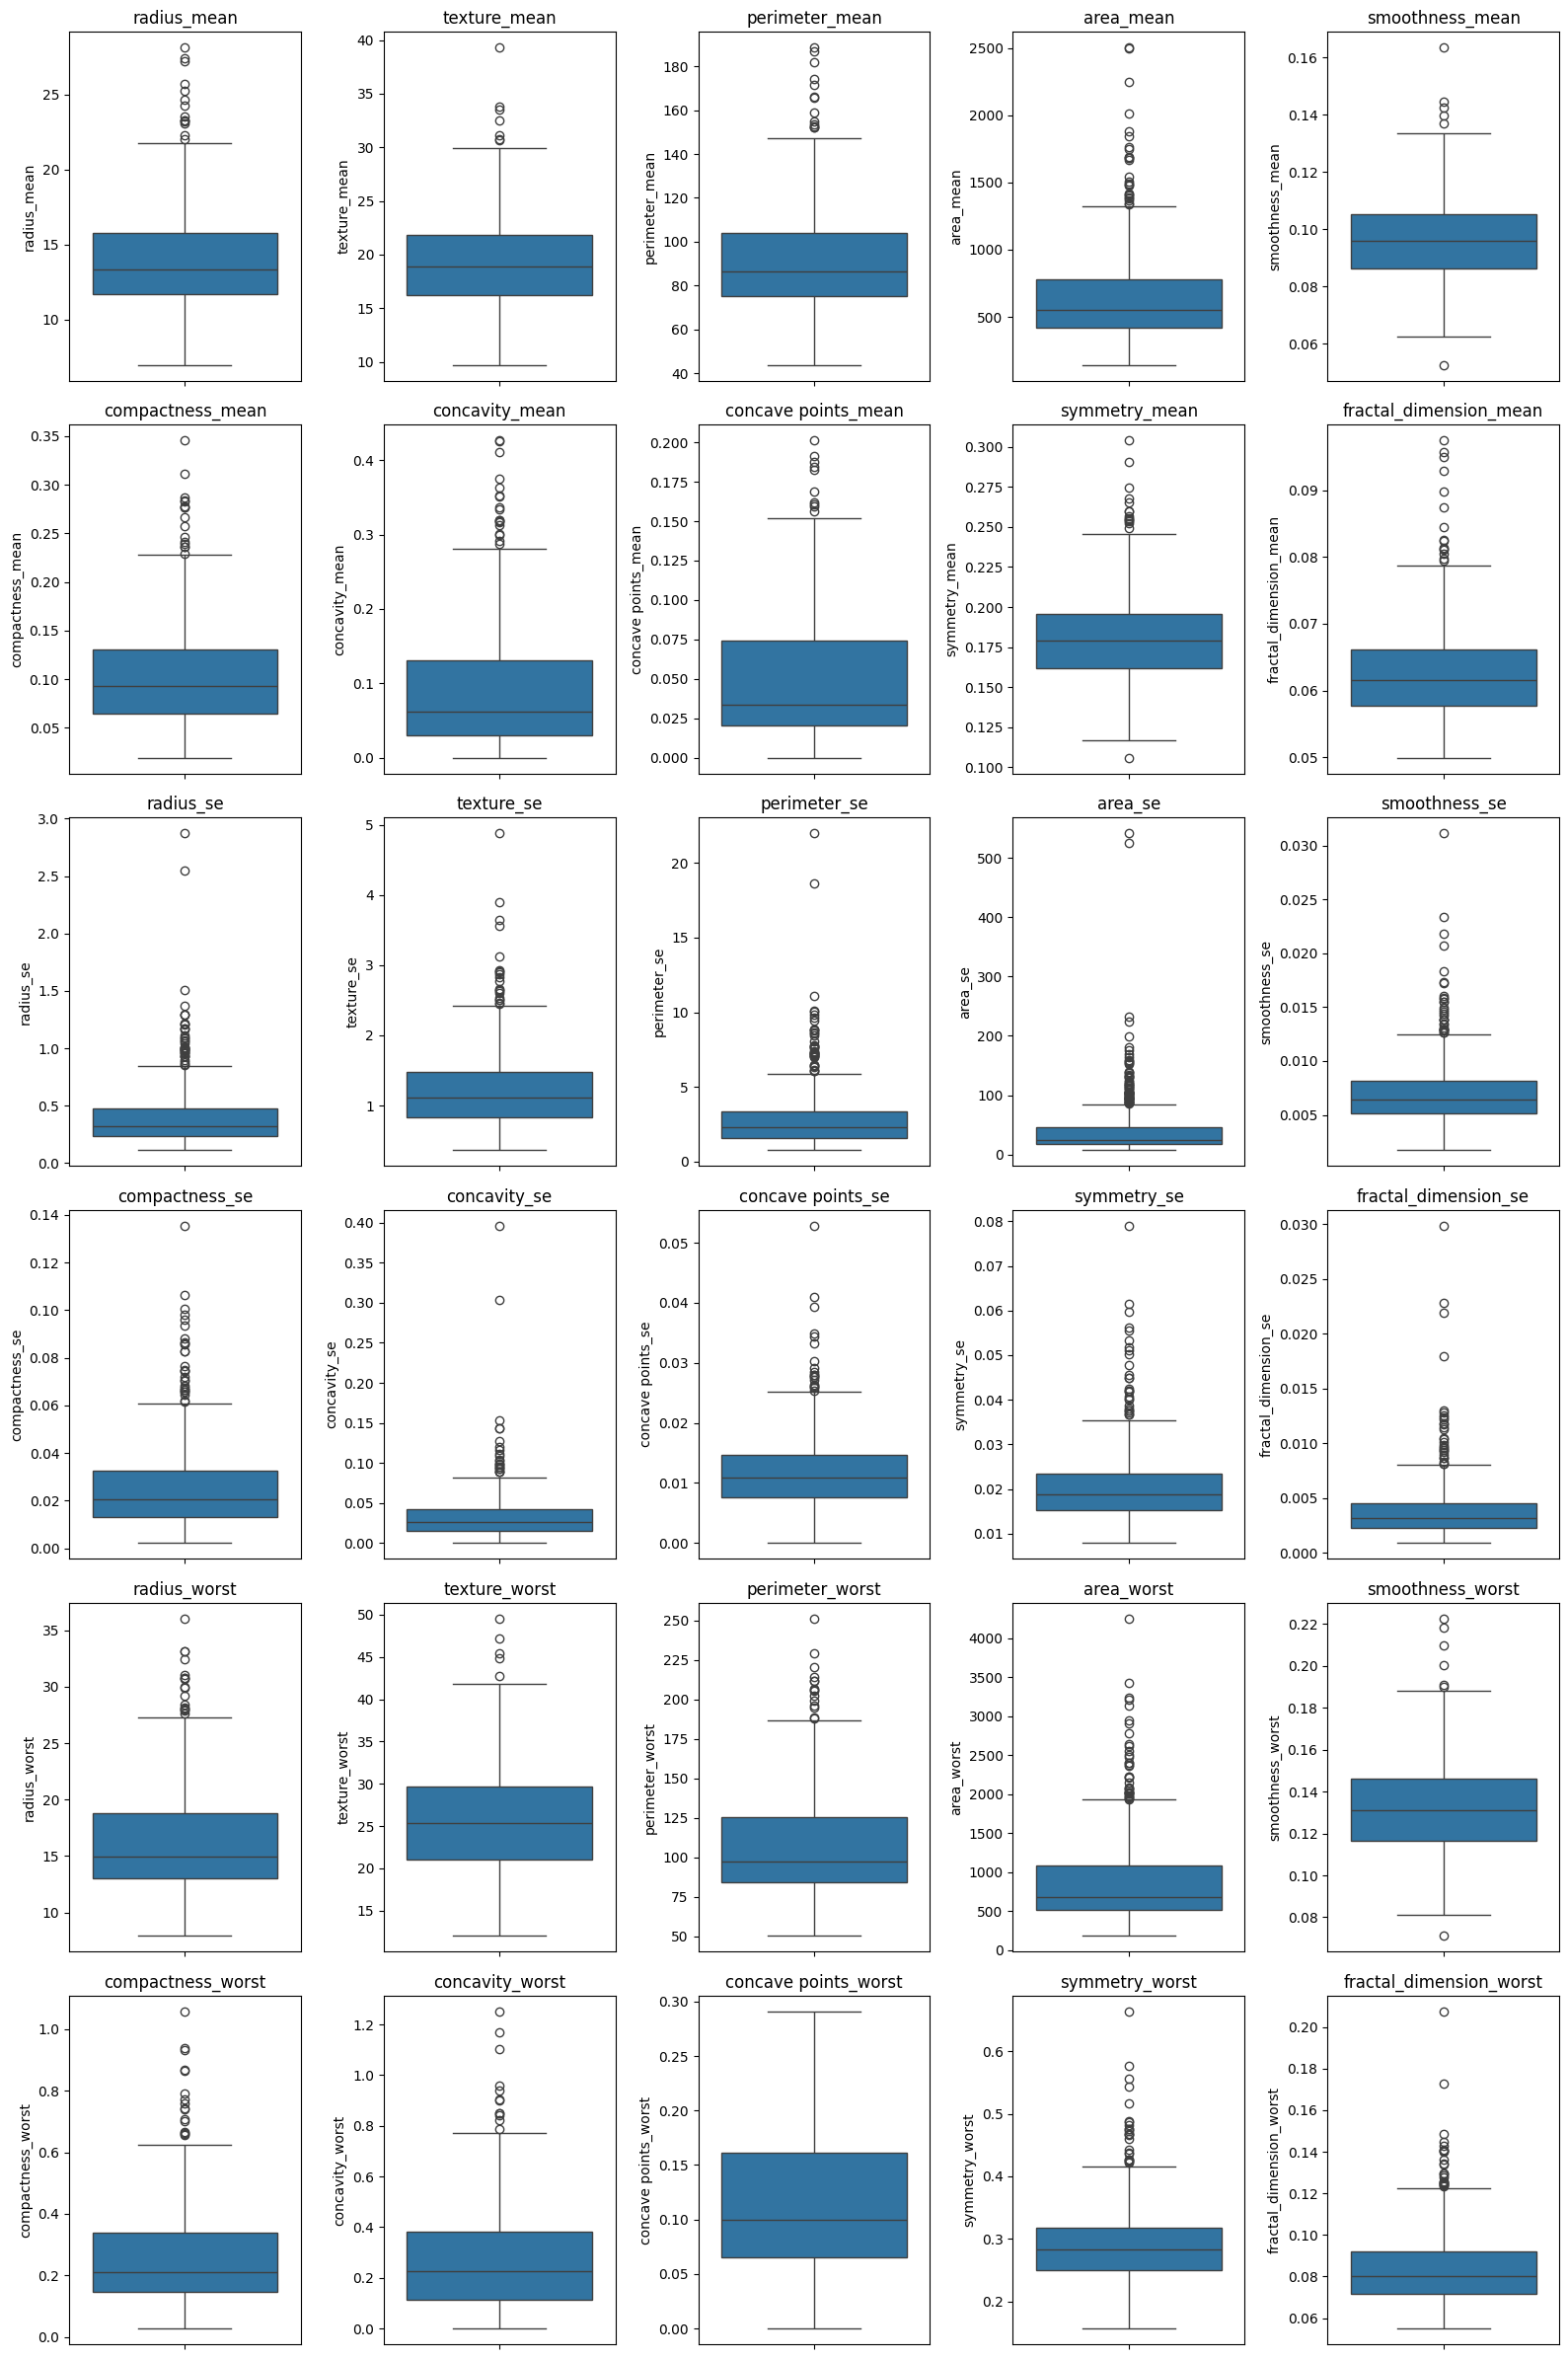

In [ ]:
# Removendo colunas não numéricas
df_numeric = df.drop(['id', 'diagnosis'], axis=1)

# Calculando o número de linhas e colunas necessárias
n_features = len(df_numeric.columns)
n_cols = 5
n_rows = int(np.ceil(n_features / n_cols))

# Criando os subplots com o tamanho correto
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4*n_rows))
axes = axes.ravel() # Transforma a matriz de axes em array 1D

# Criando um boxplot para cada coluna
for idx, coluna in enumerate(df_numeric.columns):
    sns.boxplot(data=df_numeric, y=coluna, ax=axes[idx])
    axes[idx].set_title(coluna)

# Removendo axes extras (se houver)
for idx in range(len(df_numeric.columns), len(axes)):
    fig.delaxes(axes[idx])

# Ajustando o layout
plt.tight_layout()
plt.show()

**Medidas de Formato:**
1. *compactness_mean, compactness_se, compactness_worst, concavity_mean, concavity_se, concavity_worst
concave points_mean, concave points_se, concave points_worst*
  * Apresentam muitos outliers superiores e alta variabilidade nas medidas.
As versões '_worst' tendem a ter mais outliers. Estas medidas são importantes para diferenciar tumores benignos e malignos.


**Medidas de Simetria:**
2. *symmetry_mean, symmetry_se, symmetry_worst*   
  * Distribuição relativamente simétrica
Menos outliers que outras características
Menor variação entre as medidas mean e worst.

**Dimensão Fractal:**
3. *fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst*
  * Distribuição mais compacta e poucos outliers extremos. Valores bastante consistentes entre mean e worst.

Abaixo é possível observar o cálculo realizado pelo Boxplot considerando os atributos mais relevantes do dataset (radius_mean, area_mean e texture_mean)


Estatísticas para radius_mean:
Valor máximo boxplot: 21.90
Valor mínimo boxplot: 5.58
Q1: 11.70
Q3: 15.78
IQR (Intervalo Interquartil): 4.08
Número de outliers: 14
Percentual de outliers: 2.46%

Estatísticas para area_mean:
Valor máximo boxplot: 1326.30
Valor mínimo boxplot: -123.30
Q1: 420.30
Q3: 782.70
IQR (Intervalo Interquartil): 362.40
Número de outliers: 25
Percentual de outliers: 4.39%

Estatísticas para texture_mean:
Valor máximo boxplot: 30.24
Valor mínimo boxplot: 7.73
Q1: 16.17
Q3: 21.80
IQR (Intervalo Interquartil): 5.63
Número de outliers: 7
Percentual de outliers: 1.23%


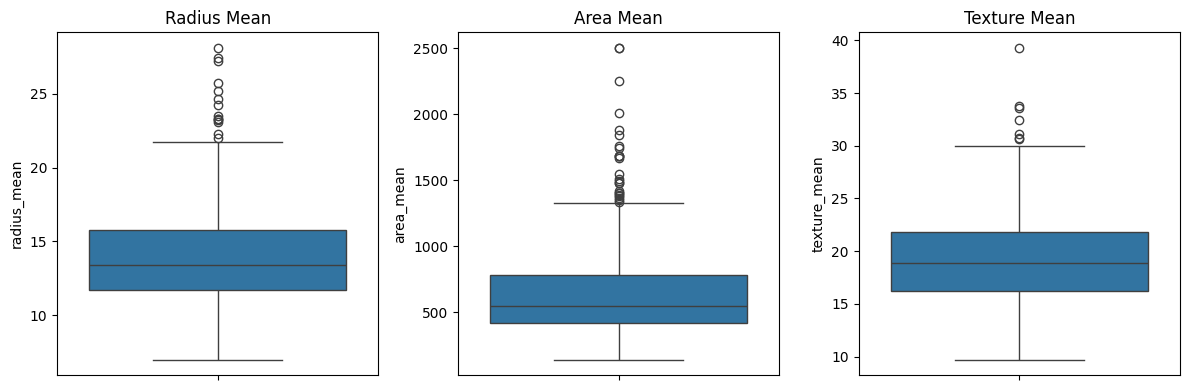

In [ ]:
# Função para calcular os quartis e limites
def calcular_quartis(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    Valor_Maximo = Q3 + 1.5 * IQR
    Valor_Minimo = Q1 - 1.5 * IQR

    print(f"\nEstatísticas para {coluna}:")
    print(f"Valor máximo boxplot: {Valor_Maximo:.2f}")
    print(f"Valor mínimo boxplot: {Valor_Minimo:.2f}")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR (Intervalo Interquartil): {IQR:.2f}")

    # Contando outliers
    outliers = df[(df[coluna] > Valor_Maximo) | (df[coluna] < Valor_Minimo)][coluna]
    print(f"Número de outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Percentual de outliers: {(len(outliers)/len(df)*100):.2f}%")

# Calculando para radius_mean
calcular_quartis(df, "radius_mean")

# Calculando para area_mean
calcular_quartis(df, "area_mean")

# Calculando para texture_mean
calcular_quartis(df, "texture_mean")

# Visualização dos outliers em um boxplot
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(data=df, y='radius_mean')
plt.title('Radius Mean')

plt.subplot(1,3,2)
sns.boxplot(data=df, y='area_mean')
plt.title('Area Mean')

plt.subplot(1,3,3)
sns.boxplot(data=df, y='texture_mean')
plt.title('Texture Mean')

plt.tight_layout()
plt.show()


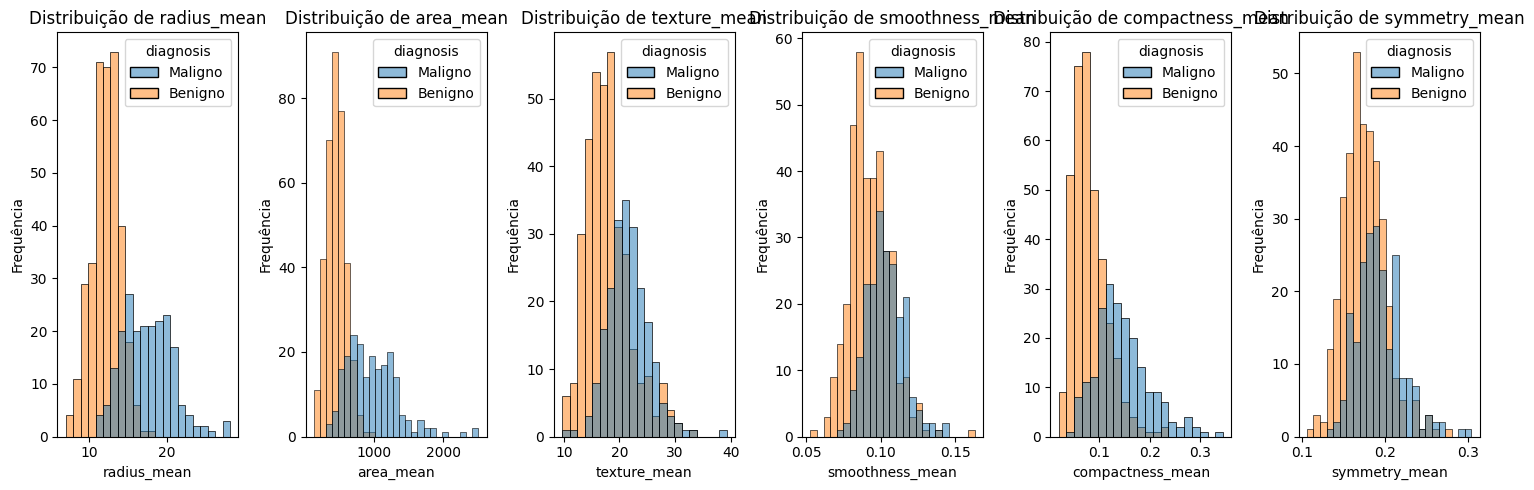


Estatísticas para radius_mean:
           count       mean       std     min     25%     50%    75%    max
diagnosis                                                                  
Benigno    357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85
Maligno    212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11

Estatísticas para area_mean:
           count        mean         std    min    25%    50%      75%     max
diagnosis                                                                     
Benigno    357.0  462.790196  134.287118  143.5  378.2  458.4   551.10   992.1
Maligno    212.0  978.376415  367.937978  361.6  705.3  932.0  1203.75  2501.0

Estatísticas para texture_mean:
           count       mean       std    min      25%    50%     75%    max
diagnosis                                                                  
Benigno    357.0  17.914762  3.995125   9.71  15.1500  17.39  19.760  33.81
Maligno    212.0  21.604906  3.779470  10.38  19.3275  21

In [ ]:
# Definindo as características que queremos analisar
caracteristicas = ['radius_mean', 'area_mean', 'texture_mean','smoothness_mean', 'compactness_mean', 'symmetry_mean']

# Criando histogramas
plt.figure(figsize=(15, 5))

# Criando histogramas para cada característica, separados por diagnóstico
for i, coluna in enumerate(caracteristicas):
    plt.subplot(1, 6, i+1)

    # Plotando histograma separado por diagnóstico
    sns.histplot(data=df_final, x=coluna, hue='diagnosis', multiple="layer", alpha=0.5)

    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Adicionando estatísticas descritivas
for coluna in caracteristicas:
    print(f"\nEstatísticas para {coluna}:")
    print(df_final.groupby('diagnosis')[coluna].describe())



As medidas de tamanho (raio, perímetro e área) demonstraram ser os indicadores mais eficazes para distinguir entre tumores benignos e malignos, com tumores malignos consistentemente apresentando valores maiores e maior variabilidade. As características relacionadas à forma do tumor, especialmente os pontos côncavos e concavidade, também mostraram forte poder discriminativo. Por outro lado, medidas de simetria e dimensão fractal apresentaram maior sobreposição entre as classes, sugerindo menor utilidade para o diagnóstico.

A maioria das características exibe distribuições assimétricas positivas, particularmente nas medidas de tamanho, indicando a necessidade de transformações apropriadas durante o pré-processamento dos dados. As diferentes escalas entre as características também apontam para a importância da normalização ou padronização dos dados.

A seguir, iremos analisar gráficos de densidade, que permitem a visualização de curvas assimétricas

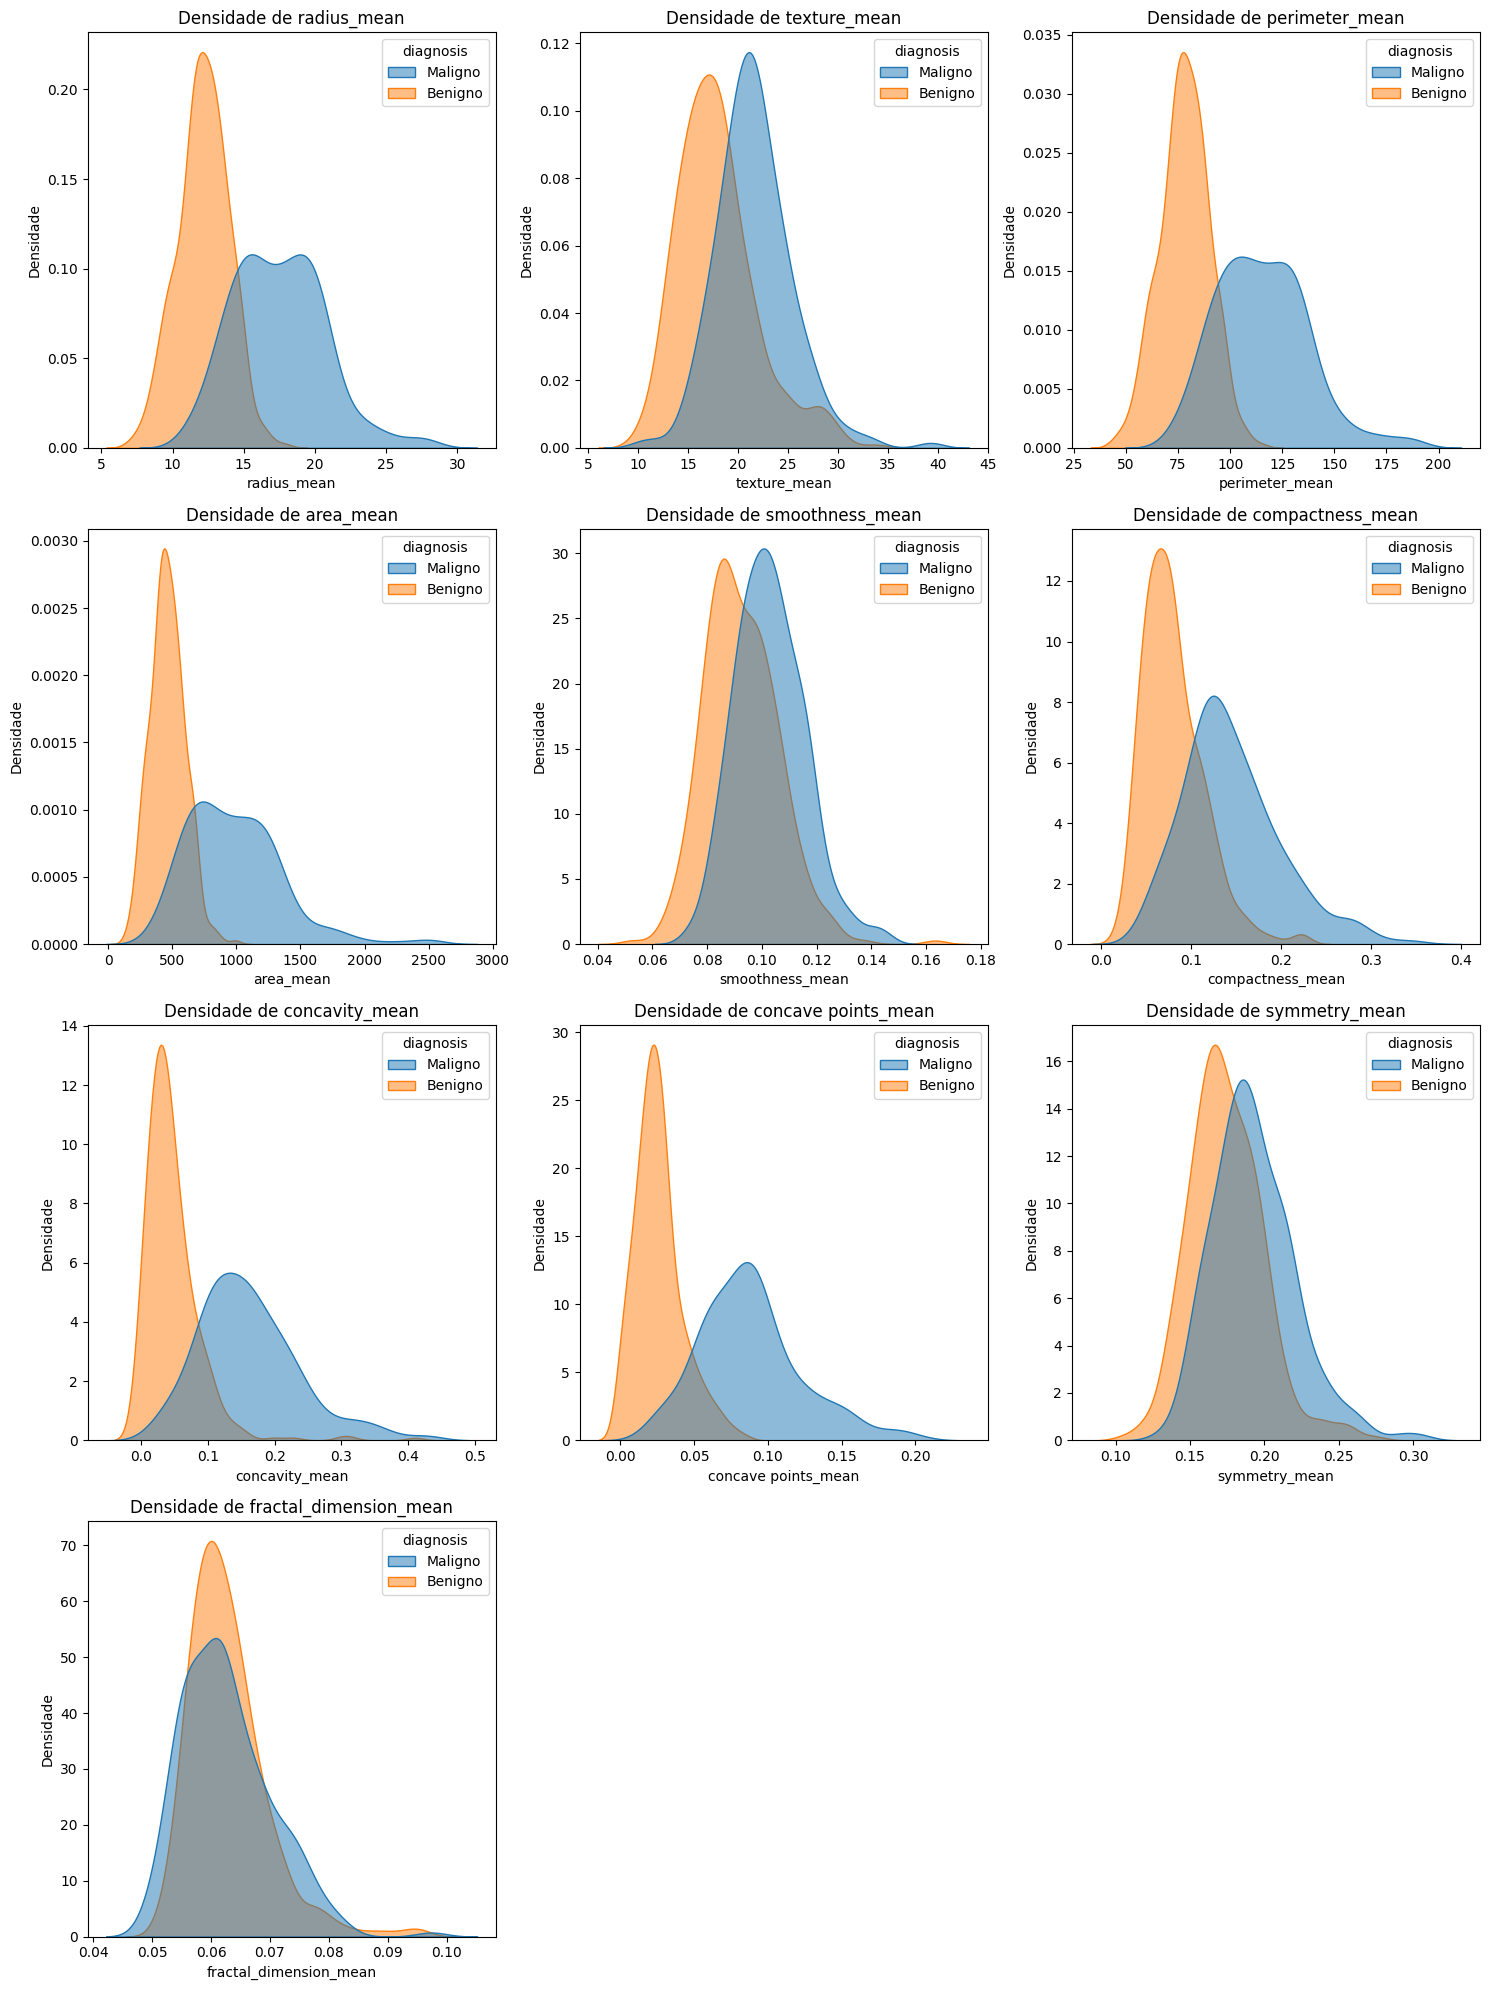


Estatísticas de tendência central para radius_mean:
             mean  median
diagnosis                
Benigno    12.147  12.200
Maligno    17.463  17.325

Estatísticas de tendência central para texture_mean:
             mean  median
diagnosis                
Benigno    17.915   17.39
Maligno    21.605   21.46

Estatísticas de tendência central para perimeter_mean:
              mean  median
diagnosis                 
Benigno     78.075   78.18
Maligno    115.365  114.20

Estatísticas de tendência central para area_mean:
              mean  median
diagnosis                 
Benigno    462.790   458.4
Maligno    978.376   932.0

Estatísticas de tendência central para smoothness_mean:
            mean  median
diagnosis               
Benigno    0.092   0.091
Maligno    0.103   0.102

Estatísticas de tendência central para compactness_mean:
            mean  median
diagnosis               
Benigno    0.080   0.075
Maligno    0.145   0.132

Estatísticas de tendência central para concavi

In [ ]:
# Selecionando todas as características que terminam com '_mean'
caracteristicas = [col for col in df_final.columns if col.endswith('_mean')]

# Configurando o layout
n_cols = 3
n_rows = len(caracteristicas) // n_cols + (1 if len(caracteristicas) % n_cols != 0 else 0)

# Criando a figura
plt.figure(figsize=(15, 5*n_rows))

# Criando gráficos de densidade para cada característica
for i, coluna in enumerate(caracteristicas):
    plt.subplot(n_rows, n_cols, i+1)

    # Plotando densidade separada por diagnóstico
    sns.kdeplot(data=df_final, x=coluna, hue='diagnosis', common_norm=False, fill=True, alpha=0.5)

    plt.title(f'Densidade de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

# Adicionando estatísticas de tendência central
for coluna in caracteristicas:
    print(f"\nEstatísticas de tendência central para {coluna}:")
    print(df_final.groupby('diagnosis')[coluna].agg(['mean', 'median']).round(3))

#### 5.2.2 Multimodais


As análises multimodais são fundamentais no processo de compreensão de dados complexos, como os apresentados neste estudo sobre câncer de mama, pois permitem examinar simultaneamente as relações entre múltiplas características e seu comportamento conjunto. Diferentemente das análises univariadas, que observam cada variável isoladamente, as visualizações multimodais como pairplots e jointplots revelam padrões e correlações que seriam impossíveis de detectar olhando para cada característica separadamente.

No contexto médico deste dataset, esta abordagem é particularmente valiosa pois permite identificar como diferentes aspectos dos tumores se relacionam entre si e como essas relações variam entre casos benignos e malignos.

A seguir, será apresentada a matriz de correlação, explorando a covariância entre variáveis numéricas, uma medida que reflete a relação entre elas. Utilizamos o coeficiente de correlação de Pearson, onde valores próximos de -1 ou +1 indicam correlação negativa ou positiva, respectivamente, e valores próximos de 0 indicam ausência de correlação.

Essa análise é crucial, pois algoritmos como regressão linear e logística podem enfrentar problemas de desempenho com atributos altamente correlacionados. Recomenda-se consultar a documentação do algoritmo para determinar se ajustes no conjunto de dados são necessários.

A importância da correlação entre atributos foi destacada previamente, e agora visualizamos essa informação por meio da matriz de correlação, proporcionando uma compreensão gráfica das relações entre os atributos numéricos.

O código subsequente exibe essa matriz para uma análise visual mais intuitiva das correlações.
Utilizou-se o dataframe original, apenas para demonstração, já que o gráfico não executa para valores com string (no caso a variável categórica 'sex'). Outra maneira, seria criar um novo dataframe, eliminando a coluna 'sex'.

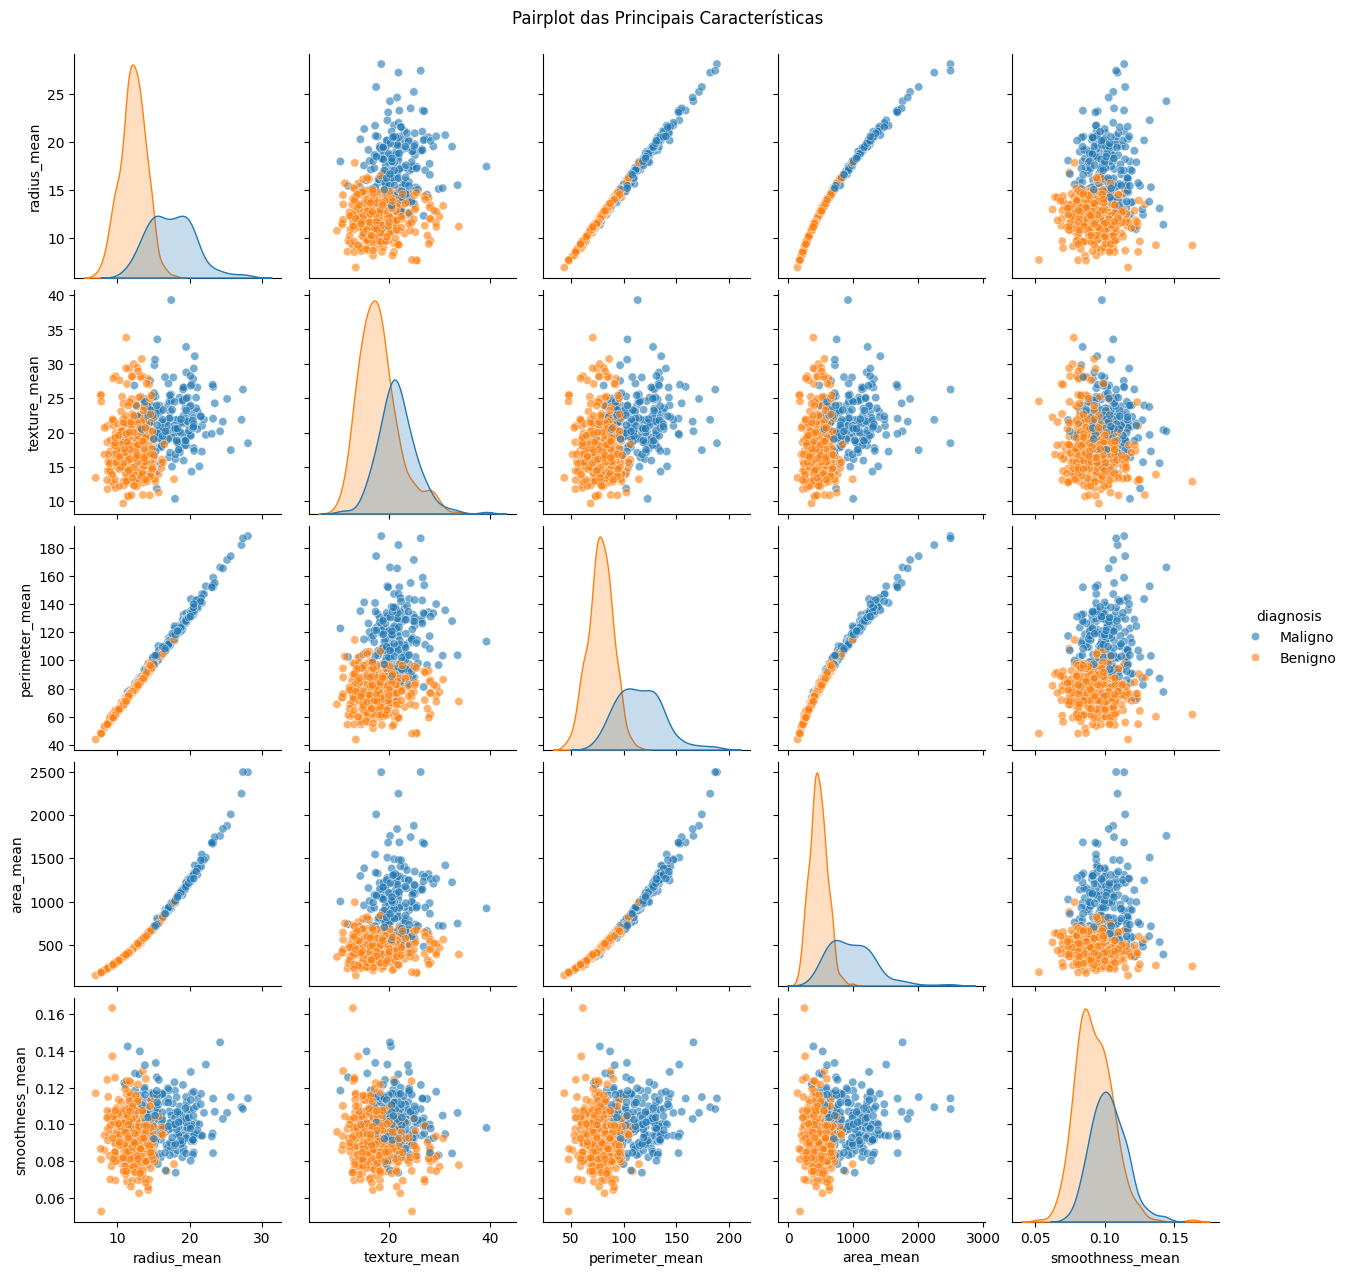

<Figure size 1500x500 with 0 Axes>

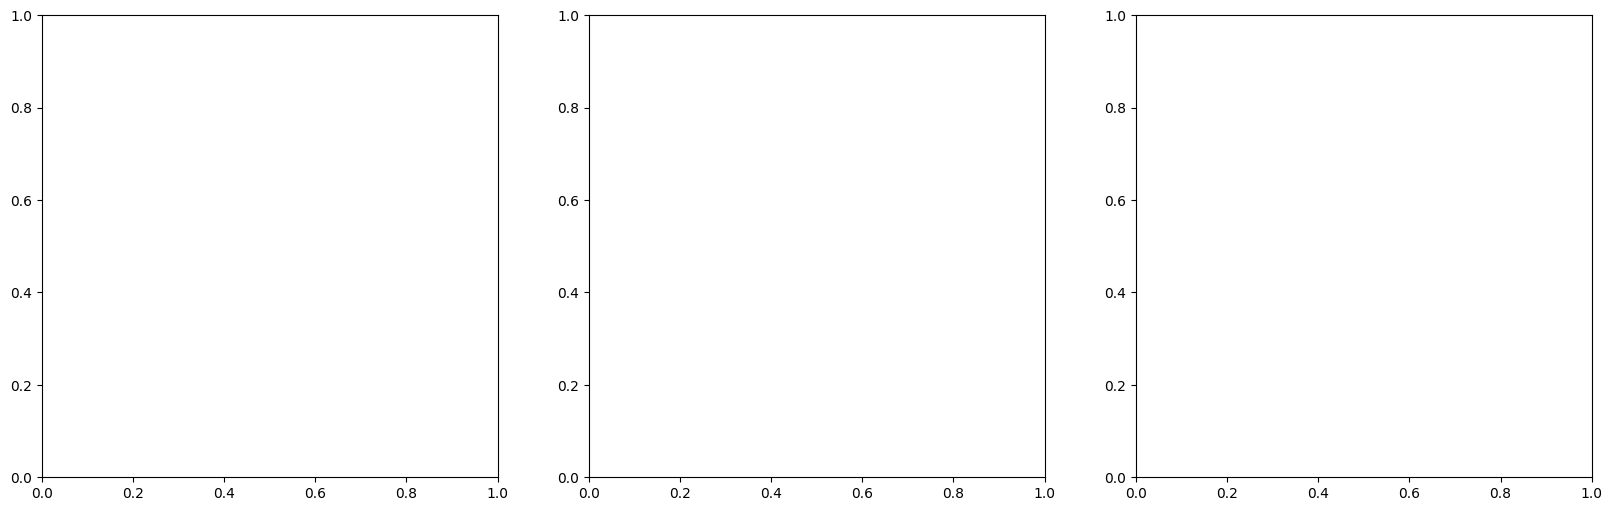

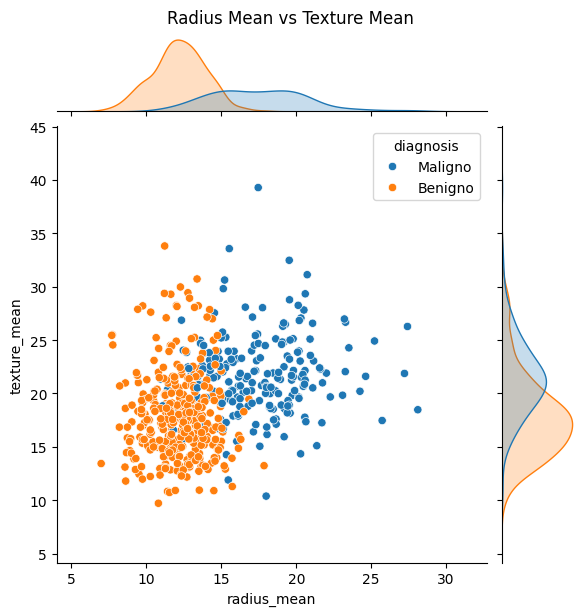

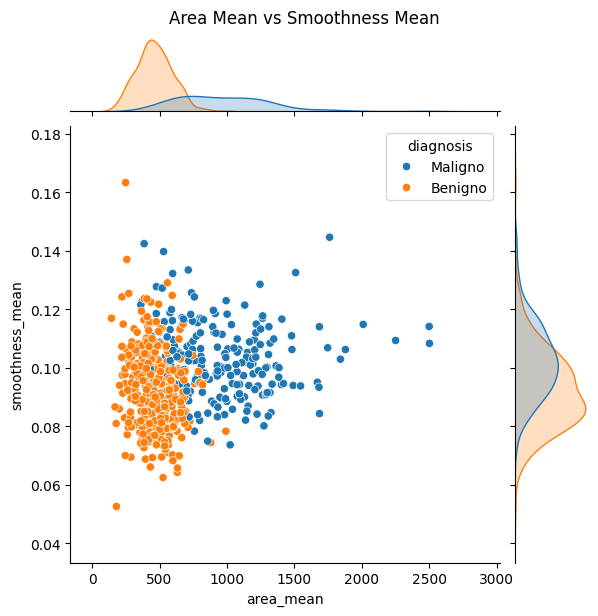

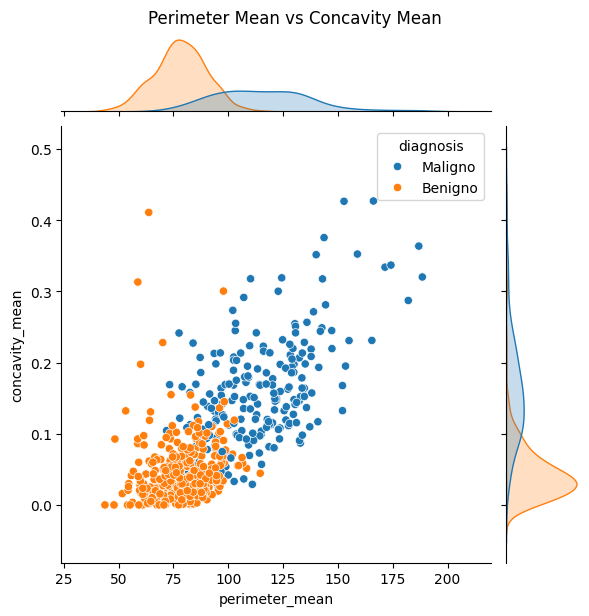

In [ ]:
# 1. Pairplot para as principais características
principais_caracteristicas = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Criando o pairplot
sns.pairplot(df_final,
             vars=principais_caracteristicas,
             hue='diagnosis',
             diag_kind='kde',  # Usar KDE na diagonal
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot das Principais Características', y=1.02)
plt.show()

# 2. Jointplots para pares específicos de características
plt.figure(figsize=(15, 5))

# Criando três jointplots interessantes
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Primeiro jointplot
sns.jointplot(data=df_final,
             x='radius_mean',
             y='texture_mean',
             hue='diagnosis',
             kind='scatter')
plt.suptitle('Radius Mean vs Texture Mean', y=1.02)
plt.show()

# Segundo jointplot
sns.jointplot(data=df_final,
             x='area_mean',
             y='smoothness_mean',
             hue='diagnosis',
             kind='scatter')
plt.suptitle('Area Mean vs Smoothness Mean', y=1.02)
plt.show()

# Terceiro jointplot
sns.jointplot(data=df_final,
             x='perimeter_mean',
             y='concavity_mean',
             hue='diagnosis',
             kind='scatter')
plt.suptitle('Perimeter Mean vs Concavity Mean', y=1.02)
plt.show()



A análise multimodal das características do conjunto de dados de câncer de mama revelou padrões significativos e relações importantes entre as diferentes medidas. As visualizações demonstraram que as medidas de tamanho do tumor (raio, perímetro e área) apresentam forte correlação positiva entre si e oferecem a melhor separação entre tumores benignos e malignos. Estas características exibem uma relação praticamente linear, com tumores malignos consistentemente apresentando valores mais elevados e ocupando a região superior direita dos gráficos de dispersão, enquanto os tumores benignos se concentram na região inferior esquerda.

Por outro lado, características como textura e suavidade mostram uma correlação mais fraca com as medidas de tamanho e apresentam maior sobreposição entre as classes de diagnóstico, sugerindo um menor poder discriminativo quando utilizadas isoladamente. As distribuições marginais revelam padrões bimodais em algumas características, com maior variabilidade nos casos malignos e uma tendência à assimetria positiva em várias medidas.

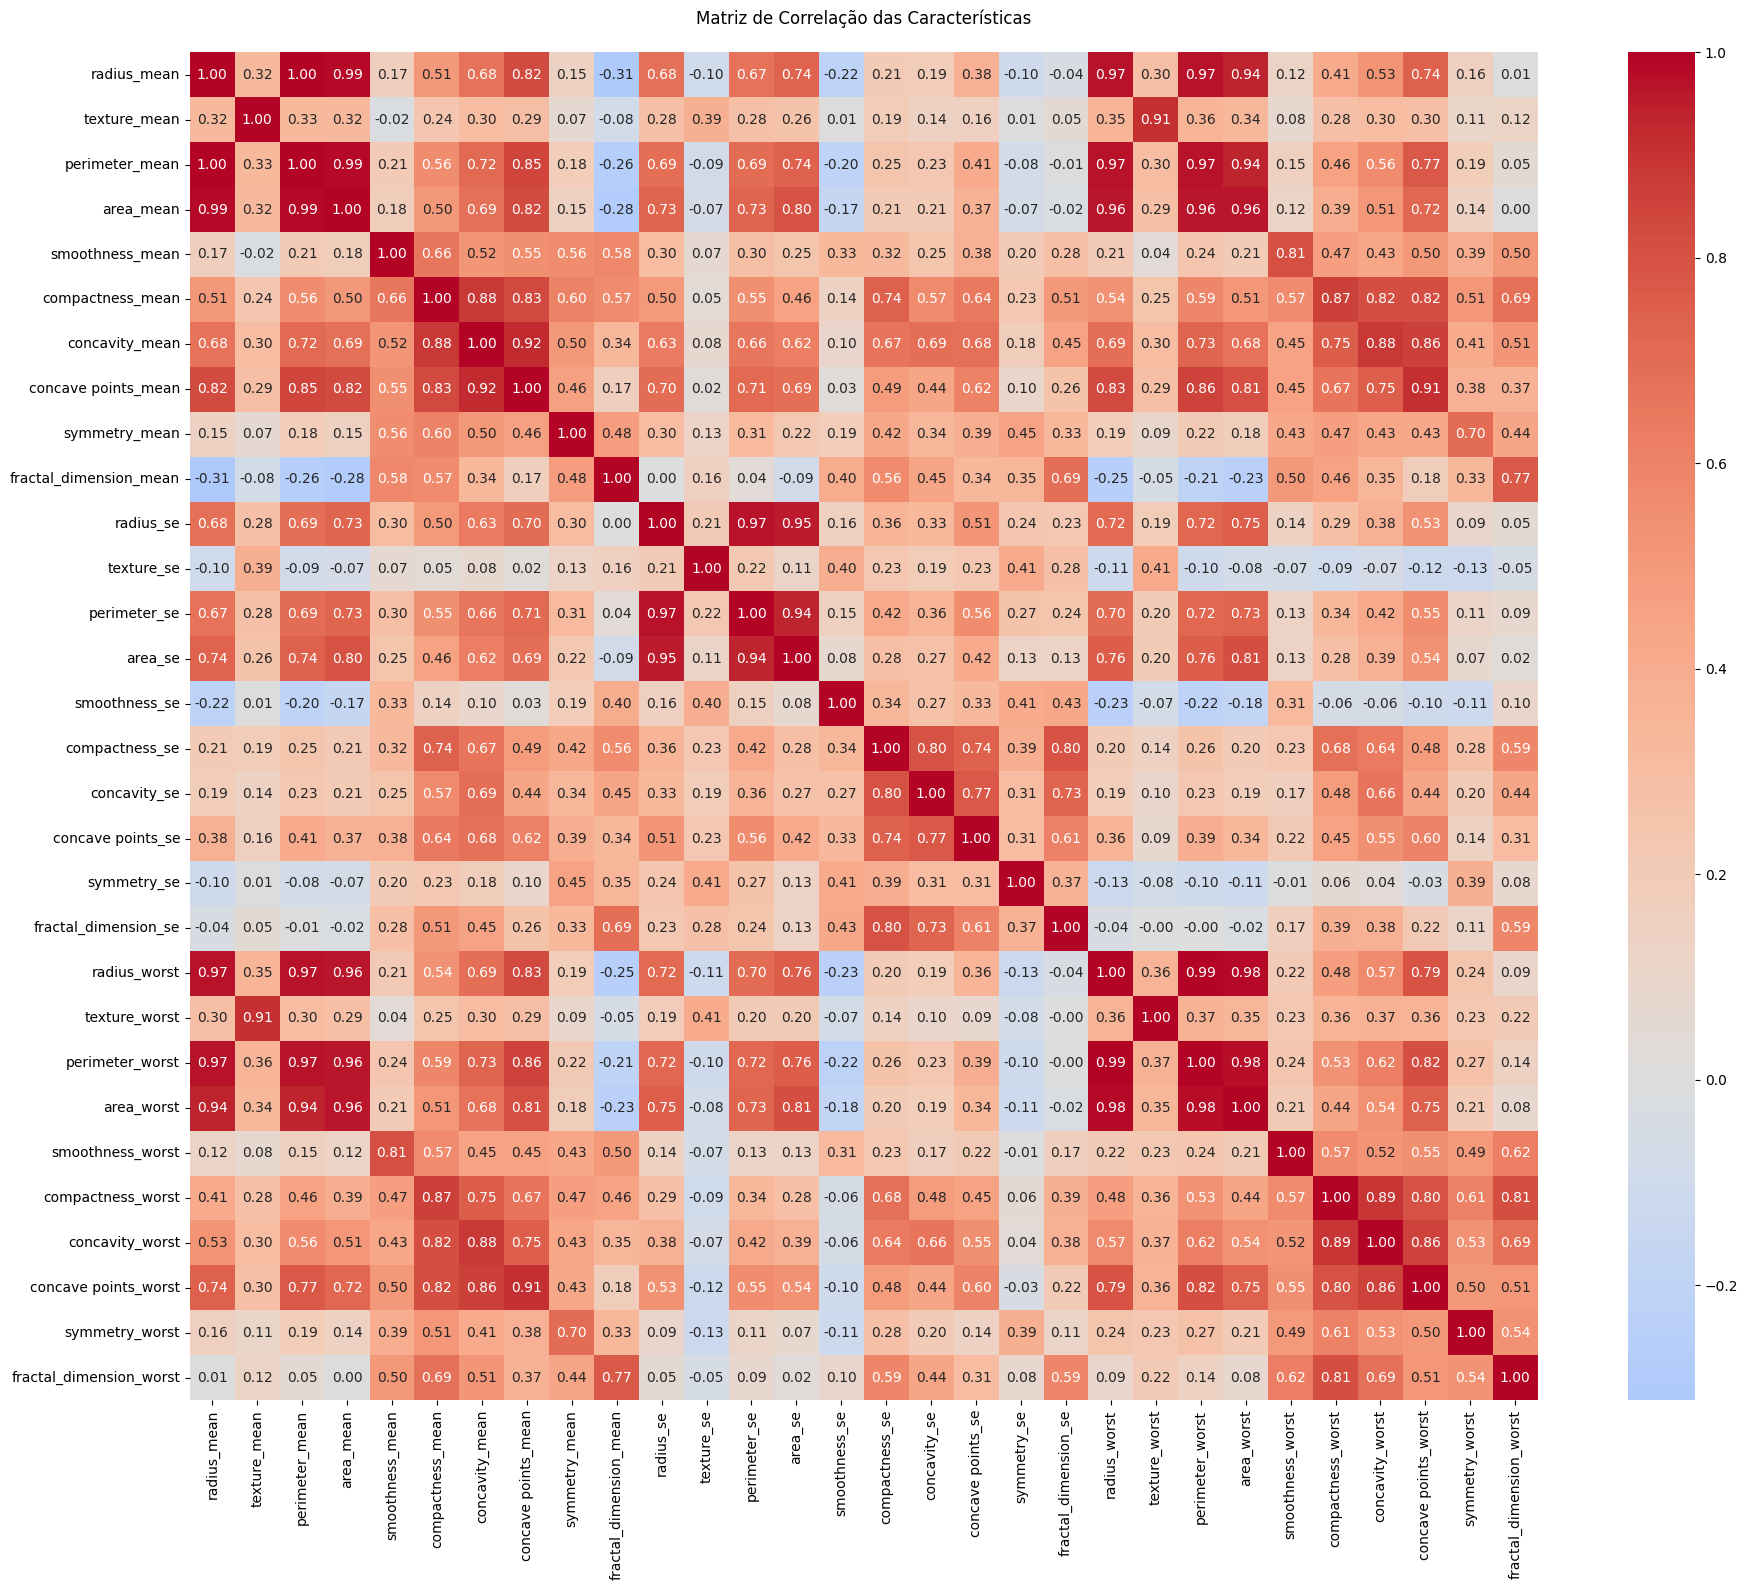


Correlações mais fortes (|r| > 0.9):
perimeter_mean        radius_mean             0.997855
radius_mean           perimeter_mean          0.997855
radius_worst          perimeter_worst         0.993708
perimeter_worst       radius_worst            0.993708
radius_mean           area_mean               0.987357
area_mean             radius_mean             0.987357
                      perimeter_mean          0.986507
perimeter_mean        area_mean               0.986507
area_worst            radius_worst            0.984015
radius_worst          area_worst              0.984015
area_worst            perimeter_worst         0.977578
perimeter_worst       area_worst              0.977578
radius_se             perimeter_se            0.972794
perimeter_se          radius_se               0.972794
perimeter_worst       perimeter_mean          0.970387
perimeter_mean        perimeter_worst         0.970387
radius_mean           radius_worst            0.969539
radius_worst          radiu

In [ ]:
# Removendo colunas não numéricas
df_numeric = df.drop(['id', 'diagnosis'], axis=1)

# Criando a matriz de correlação
plt.figure(figsize=(20, 16))
correlation_matrix = df_numeric.corr()

# Criando um mapa de calor (heatmap) da matriz de correlação
sns.heatmap(correlation_matrix,
            annot=True,          # Mostra os valores
            cmap='coolwarm',     # Esquema de cores
            center=0,            # Centro da escala de cores
            fmt='.2f',          # Formato dos números (2 casas decimais)
            square=True)         # Células quadradas

plt.title('Matriz de Correlação das Características', pad=20)
plt.tight_layout()
plt.show()

# Identificando as correlações mais fortes (positivas e negativas)
# Criando um DataFrame com todas as correlações
correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(key=abs, ascending=False)

# Removendo autocorrelações (correlação de uma variável com ela mesma = 1.0)
sorted_correlations = sorted_correlations[sorted_correlations != 1.0]

print("\nCorrelações mais fortes (|r| > 0.9):")
print(sorted_correlations[abs(sorted_correlations) > 0.9])

Análise da Matriz de Correlação:

**Correlações Muito Fortes (|r| > 0.9):**
* radius_mean e perimeter_mean (≈ 0.98): Relação quase perfeita, esperada pois o perímetro é função do raio
radius_mean e area_mean (≈ 0.97): Também esperada pois a área é função quadrática do raio
perimeter_mean e area_mean (≈ 0.99): Forte relação devido à dependência geométrica

**Correlações Fortes (0.7 < |r| < 0.9):**
* concavity_mean e concave points_mean: Indica que estas medidas capturam aspectos similares da morfologia do tumor
Medidas 'mean' com suas respectivas medidas 'worst': Sugere consistência nas medições

**Correlações Moderadas (0.4 < |r| < 0.7):**
* texture_mean com outras características: Mostra independência relativa desta medida
smoothness_mean com outras medidas: Indica que esta é uma característica relativamente independente

**Correlações Fracas (|r| < 0.4):**
* fractal_dimension_mean com a maioria das outras características
symmetry_mean com várias outras medidas

### 5.3. Gráficos


Os gráficos básicos desempenham um papel importante ao facilitar a visualização e interpretação dos atributos do conjunto de dados. Por meio deles, torna-se mais simples identificar a distribuição e a proporção de cada variável. Entre os exemplos mais usados para esse tipo de análise estão os gráficos de barras, barras empilhadas e gráficos de pizza, que ajudam a representar os dados de maneira clara e intuitiva.

#### 5.3.1 Gráfico de Barras Empilhadas



<Figure size 800x500 with 0 Axes>

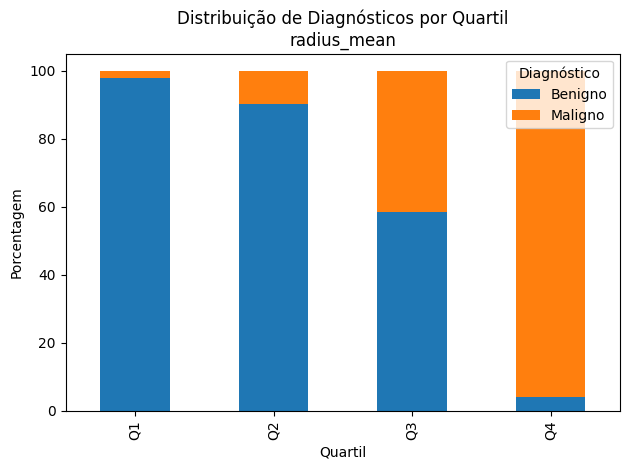

In [ ]:
# Gráfico de barras empilhadas para uma característica específica
caracteristica = 'radius_mean'
plt.figure(figsize=(8, 5))
df_final['quartil'] = pd.qcut(df[caracteristica], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
quartil_diag = pd.crosstab(df_final['quartil'], df_final['diagnosis'], normalize='index') * 100

quartil_diag.plot(kind='bar', stacked=True)
plt.title(f'Distribuição de Diagnósticos por Quartil\n{caracteristica}')
plt.xlabel('Quartil')
plt.ylabel('Porcentagem')
plt.legend(title='Diagnóstico')
plt.tight_layout()
plt.show()


Este gráfico mostra como os diagnósticos se distribuem em diferentes faixas de valores (quartis) para o raio médio. Observa-se que quartis mais altos (Q3 e Q4) têm uma proporção maior de tumores malignos, enquanto quartis mais baixos (Q1 e Q2) têm mais tumores benignos.

#### 5.3.2 Gráfico de Barras

<Figure size 1200x600 with 0 Axes>

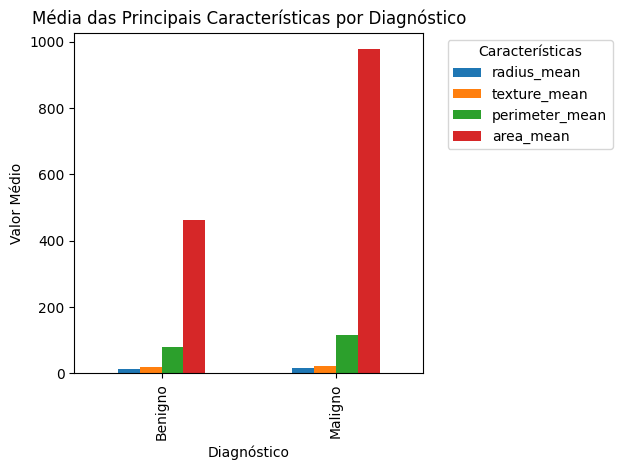

In [ ]:

# Gráfico de barras para média das principais características por diagnóstico
principais_caracteristicas = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(12, 6))
df_means = df_final.groupby('diagnosis')[principais_caracteristicas].mean()
df_means.plot(kind='bar')
plt.title('Média das Principais Características por Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Valor Médio')
plt.legend(title='Características', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Este gráfico compara as médias das principais características entre tumores benignos e malignos. Podemos observar que tumores malignos tendem a ter valores significativamente maiores em todas as características apresentadas, especialmente nas medidas de área e perímetro.

#### 5.3.3 Gráfico de Pizza

Valores únicos em diagnosis: ['Maligno' 'Benigno']

Contagem de diagnósticos:
diagnosis
Benigno    357
Maligno    212
Name: count, dtype: int64


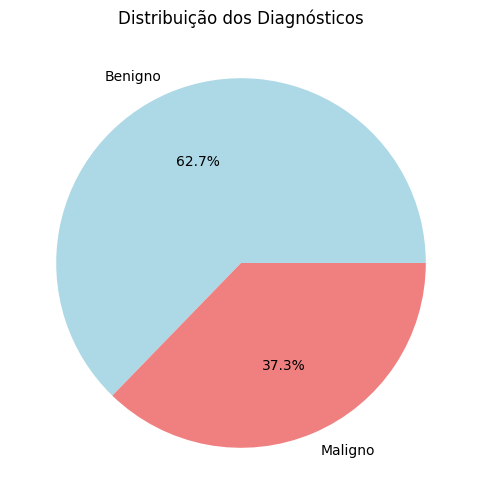

In [ ]:
# Gráfico de pizza para distribuição dos diagnósticos
plt.figure(figsize=(10, 6))
diagnosis_counts = df_final['diagnosis'].value_counts()

# Verificando as labels
print("Valores únicos em diagnosis:", df_final['diagnosis'].unique())
print("\nContagem de diagnósticos:")
print(diagnosis_counts)

# Criando o gráfico com as labels
plt.pie(diagnosis_counts,
        labels=diagnosis_counts.index,  # Usa os índices da contagem como labels
        autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'])
plt.title('Distribuição dos Diagnósticos')
plt.show()





Este gráfico mostra a distribuição proporcional dos diagnósticos no dataset. Aproximadamente 62.7% dos casos são benignos e 37.3% são malignos, o que indica um leve desbalanceamento nos dados, mas não severo o suficiente para comprometer a análise.

## 6. Pré-Processamento de dados

Nesta fase, os dados passam por procedimentos de preparação e tratamento para que possam ser utilizados adequadamente na análise. Entre as práticas aplicadas estão a remoção de inconsistências, o preenchimento ou exclusão de valores ausentes, além de técnicas de padronização e normalização para ajustar as escalas dos atributos.

#### 6.1. Limpeza e Tratamento de Missings

In [ ]:
# Verificando valores faltantes
print("Verificando valores faltantes:")
print(df_final.isnull().sum())

# Verificando valores duplicados
print("\nNúmero de registros duplicados:")
print(df_final.duplicated().sum())


Verificando valores faltantes:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
quartil                    0
dtype: int64

Analisando o código acima, não foram encontrados valores nulos e nem duplicatas, em nenhuma das coluna e portanto, não será necessário tratamento dos dados.

#### 6.2. Padronização e Normalização

Estatísticas dos dados padronizados (StandardScaler):
       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count      569.000       569.000         569.000    569.000          569.000   
mean        -0.000         0.000          -0.000     -0.000           -0.000   
std          1.001         1.001           1.001      1.001            1.001   
min         -2.030        -2.229          -1.985     -1.454           -3.112   
25%         -0.689        -0.726          -0.692     -0.667           -0.711   
50%         -0.215        -0.105          -0.236     -0.295           -0.035   
75%          0.469         0.584           0.500      0.364            0.636   
max          3.971         4.652           3.976      5.251            4.771   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count           569.000         569.000              569.000        569.000   
mean              0.000           0.000               -0.000       

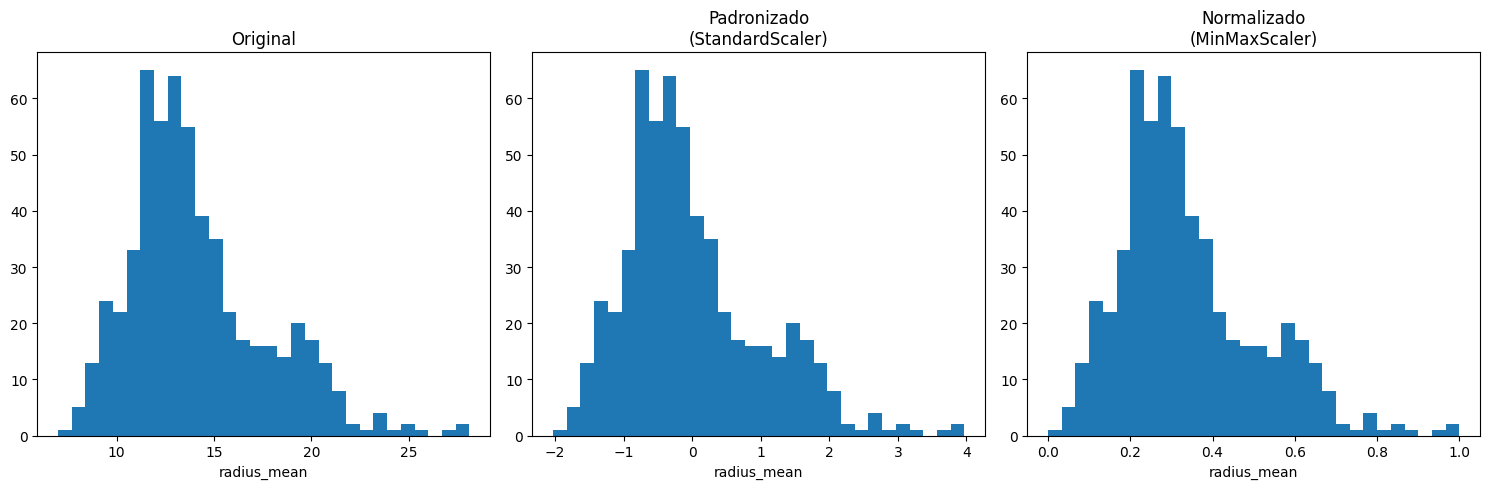

In [ ]:
# 1. Preparação dos dados
# Removendo a coluna 'quartil' se ela existir
if 'quartil' in df.columns:
    df = df.drop('quartil', axis=1)

# Separando features e target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# 2. Criando e aplicando os scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_standardized = standard_scaler.fit_transform(X)
X_normalized = minmax_scaler.fit_transform(X)

# Convertendo para DataFrame para melhor visualização
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# 3. Visualizando os resultados
print("Estatísticas dos dados padronizados (StandardScaler):")
print(X_standardized.describe().round(3))
print("\nEstatísticas dos dados normalizados (MinMaxScaler):")
print(X_normalized.describe().round(3))

# 4. Visualizando a distribuição de uma feature específica
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Dados originais
plt.subplot(131)
plt.hist(X['radius_mean'], bins=30)
plt.title('Original')
plt.xlabel('radius_mean')

# Dados padronizados
plt.subplot(132)
plt.hist(X_standardized['radius_mean'], bins=30)
plt.title('Padronizado\n(StandardScaler)')
plt.xlabel('radius_mean')

# Dados normalizados
plt.subplot(133)
plt.hist(X_normalized['radius_mean'], bins=30)
plt.title('Normalizado\n(MinMaxScaler)')
plt.xlabel('radius_mean')

plt.tight_layout()
plt.show()



A análise dos dados após a aplicação das técnicas de normalização revelou aspectos importantes sobre as transformações realizadas no conjunto de dados do câncer de mama. Ao aplicar o StandardScaler, observamos que os dados foram transformados para uma escala onde a média é centralizada em zero e o desvio padrão é unitário, mantendo a forma original da distribuição dos dados. Esta transformação é particularmente adequada para este conjunto de dados, uma vez que as variáveis apresentam distribuições aproximadamente normais.

Em paralelo, a normalização realizada através do MinMaxScaler redimensionou os dados para o intervalo entre 0 e 1, também preservando o formato da distribuição original. Embora esta técnica seja útil em certos contextos, especialmente quando há necessidade de limites específicos nos valores das variáveis, ela se mostra mais sensível à presença de outliers, que foram identificados em nossa análise exploratória anterior.

Considerando as características específicas deste conjunto de dados de câncer de mama, a padronização através do StandardScaler se apresenta como a escolha mais apropriada. Esta decisão é fundamentada em três aspectos principais: primeiro, a natureza aproximadamente normal das distribuições das variáveis; segundo, a presença significativa de outliers, que poderiam distorcer excessivamente os resultados da normalização MinMax; e terceiro, a ausência de necessidade de restringir os valores a um intervalo específico.

### 6.3 Separação do Dataset em Treino/Teste

A divisão do conjunto de dados foi realizada seguindo uma proporção de 70% dos dados para treinamento e 30% para teste, uma estratégia comum em problemas de machine learning que permite uma avaliação robusta do modelo (Train-Test-Split). O processo foi executado utilizando a função train_test_split da biblioteca scikit-learn, que recebeu como entrada a matriz de atributos X (contendo as 30 características já padronizadas do conjunto de dados) e o vetor de classes y (contendo os diagnósticos 'B' para benigno e 'M' para maligno).

Para garantir a reprodutibilidade dos resultados, foi definida uma semente aleatória (random_state=42). Além disso, o parâmetro stratify=y foi utilizado para assegurar que a proporção entre as classes (benigno e maligno) fosse mantida tanto no conjunto de treino quanto no de teste, evitando possíveis vieses na avaliação do modelo.

A divisão resultou em quatro conjuntos de dados: X_train e y_train para treinamento, contendo 70% das amostras, e X_test e y_test para teste, contendo os 30% restantes. A verificação das dimensões e distribuições confirma que a divisão foi realizada corretamente, mantendo as proporções desejadas tanto no tamanho dos conjuntos quanto na distribuição das classes. Esta estruturação dos dados permite que o modelo seja treinado com uma quantidade significativa de amostras e ainda seja avaliado em um conjunto substancial de dados não vistos durante o treinamento, fornecendo assim uma estimativa confiável do seu desempenho em novos casos.

In [ ]:
# Definindo X (features) e y (target)
X = X_standardized  # Usando os dados já padronizados
y = df['diagnosis']

# Realizando a divisão treino-teste (70-30)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,    # 30% para teste
                                                    random_state=42,   # Semente para reprodutibilidade
                                                    stratify=y)       # Mantém proporção das classes

# Verificando as dimensões e distribuições
print("1. Dimensões dos conjuntos:")
print(f"Conjunto completo: {X.shape}")
print(f"Conjunto de treino: {X_train.shape} ({(X_train.shape[0]/X.shape[0])*100:.1f}% dos dados)")
print(f"Conjunto de teste: {X_test.shape} ({(X_test.shape[0]/X.shape[0])*100:.1f}% dos dados)")

print("\n2. Distribuição das classes:")
print("\nConjunto de treino:")
print(y_train.value_counts())
print("\nProporção no treino:")
print(y_train.value_counts(normalize=True).round(3))

print("\nConjunto de teste:")
print(y_test.value_counts())
print("\nProporção no teste:")
print(y_test.value_counts(normalize=True).round(3))

1. Dimensões dos conjuntos:
Conjunto completo: (569, 30)
Conjunto de treino: (398, 30) (69.9% dos dados)
Conjunto de teste: (171, 30) (30.1% dos dados)

2. Distribuição das classes:

Conjunto de treino:
diagnosis
Benigno    398
Name: count, dtype: int64

Proporção no treino:
diagnosis
Benigno    1.0
Name: proportion, dtype: float64

Conjunto de teste:
diagnosis
Benigno    171
Name: count, dtype: int64

Proporção no teste:
diagnosis
Benigno    1.0
Name: proportion, dtype: float64


### 7. Conclusão

Este MVP possibilitou a execução das etapas fundamentais para a preparação de dados em iniciativas que envolvem análise e modelagem preditiva. De modo geral, é possível destacar:

O pré-processamento é uma fase essencial no desenvolvimento de projetos de ciência de dados. Esse processo envolve um conjunto de ações que tornam os dados brutos prontos para análise, incluindo a organização, a limpeza, o tratamento de informações ausentes, a transformação e a normalização de variáveis. Essas etapas são indispensáveis para garantir que os dados estejam em condições apropriadas para alimentar modelos e gerar resultados consistentes.

Outro ponto importante do pré-processamento é o treinamento e teste. Essa prática é indispensável para avaliar o desempenho de um modelo de maneira imparcial, pois permite verificar como ele responderia a informações novas, semelhantes às que encontraria em aplicações reais. Também contribui para reduzir o risco de overfitting, em que o modelo se ajusta demais aos dados de treino e perde capacidade de generalização. Além disso, fornece um indicativo mais fiel do comportamento do modelo quando aplicado em cenários fora do ambiente de desenvolvimento.

Em síntese, a preparação adequada dos dados, aliada à separação entre treino e teste, representa um alicerce importante para o sucesso de qualquer projeto de machine learning. Essas práticas aumentam a confiabilidade e a precisão dos modelos ao serem aplicados em dados reais.